In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat

In [9]:
##locating and reading the csv file
path="C:/Users/isis1/OneDrive/Documents/Asia_Vaccines.csv"
dataset=pd.read_csv(path)
dataset.head()

,Geographic area,Indicator,Sex,2020,2019,2018,2015
0,Afghanistan,Percentage of live births who received bacille...,Total,87,-,-,-
1,Afghanistan,Percentage of surviving infants who received t...,Total,78,-,-,-
2,Afghanistan,Percentage of surviving infants who received t...,Total,70,-,-,-
3,Afghanistan,Percentage of surviving infants who received t...,Total,70,-,-,-
4,Afghanistan,Percentage of live births who received hepatit...,Total,38,-,-,-


In [10]:
##printing the csv file as a dataframe
print(dataset)

    Geographic area                                          Indicator    Sex  \
0       Afghanistan  Percentage of live births who received bacille...  Total   
1       Afghanistan  Percentage of surviving infants who received t...  Total   
2       Afghanistan  Percentage of surviving infants who received t...  Total   
3       Afghanistan  Percentage of surviving infants who received t...  Total   
4       Afghanistan  Percentage of live births who received hepatit...  Total   
..              ...                                                ...    ...   
567           Yemen  Percentage of newborns protected at birth agai...  Total   
568           Yemen  Percentage of surviving infants who received t...  Total   
569           Yemen  Percentage of surviving infants who received t...  Total   
570           Yemen  Percentage of surviving infants who received t...  Total   
571           Yemen  Percentage of surviving infants who received t...  Total   

    2020 2019 2018 2015  
0

In [11]:
##printing the type of attributes
print(dataset.dtypes)

Geographic area    object
Indicator          object
Sex                object
2020               object
2019               object
2018               object
2015               object
dtype: object


In [12]:
## using the describe command to describe the dataset
print(dataset.describe(include="all"))

       Geographic area                                          Indicator  \
count              572                                                572   
unique              45                                                 15   
top        Philippines  Percentage of surviving infants who received t...   
freq                15                                                 45   

          Sex 2020 2019 2018 2015  
count     572  572  535  572  572  
unique      1   66    1    2    2  
top     Total   99    -    -    -  
freq      572   95  535  571  571  


In [13]:
##locating missing values
dataset.isnull().sum()

Geographic area     0
Indicator           0
Sex                 0
2020                0
2019               37
2018                0
2015                0
dtype: int64

In [14]:
##locating missing values where the is a symbol "-"
dataset.isin(['-']).sum()

Geographic area      0
Indicator            0
Sex                  0
2020                 2
2019               535
2018               571
2015               571
dtype: int64

In [15]:
##deleting columns for our data to have info from 2020
dataset = dataset.drop(dataset.columns[[4, 5, 6]], axis=1) 
dataset.head()

,Geographic area,Indicator,Sex,2020
0,Afghanistan,Percentage of live births who received bacille...,Total,87
1,Afghanistan,Percentage of surviving infants who received t...,Total,78
2,Afghanistan,Percentage of surviving infants who received t...,Total,70
3,Afghanistan,Percentage of surviving infants who received t...,Total,70
4,Afghanistan,Percentage of live births who received hepatit...,Total,38


In [28]:
#changing the dtype of column 2020 from an object to float
dataset['2020']=pd.to_numeric(dataset['2020'],errors='coerce')
dataset.dtypes

Geographic area     object
Indicator           object
Sex                 object
2020               float64
dtype: object

In [32]:
#grouping by countries with the mean of the infants vaccines
meanbygroup = dataset.groupby("Geographic area")["2020"].mean().sort_values()
meanbygroup

Geographic area
Syrian Arab Republic                60.454545
Indonesia                           63.142857
Philippines                         65.642857
Afghanistan                         65.769231
Yemen                               69.307692
Iraq                                73.357143
Lebanon                             73.818182
Lao People's Democratic Republic    75.538462
India                               78.500000
Jordan                              79.000000
Myanmar                             79.714286
Pakistan                            81.250000
Timor-Leste                         82.833333
Azerbaijan                          83.416667
Georgia                             83.785714
Nepal                               83.916667
United Arab Emirates                84.928571
Armenia                             86.142857
Qatar                               86.538462
Singapore                           86.538462
Kyrgyzstan                          87.076923
Japan             

<AxesSubplot:ylabel='Geographic area'>

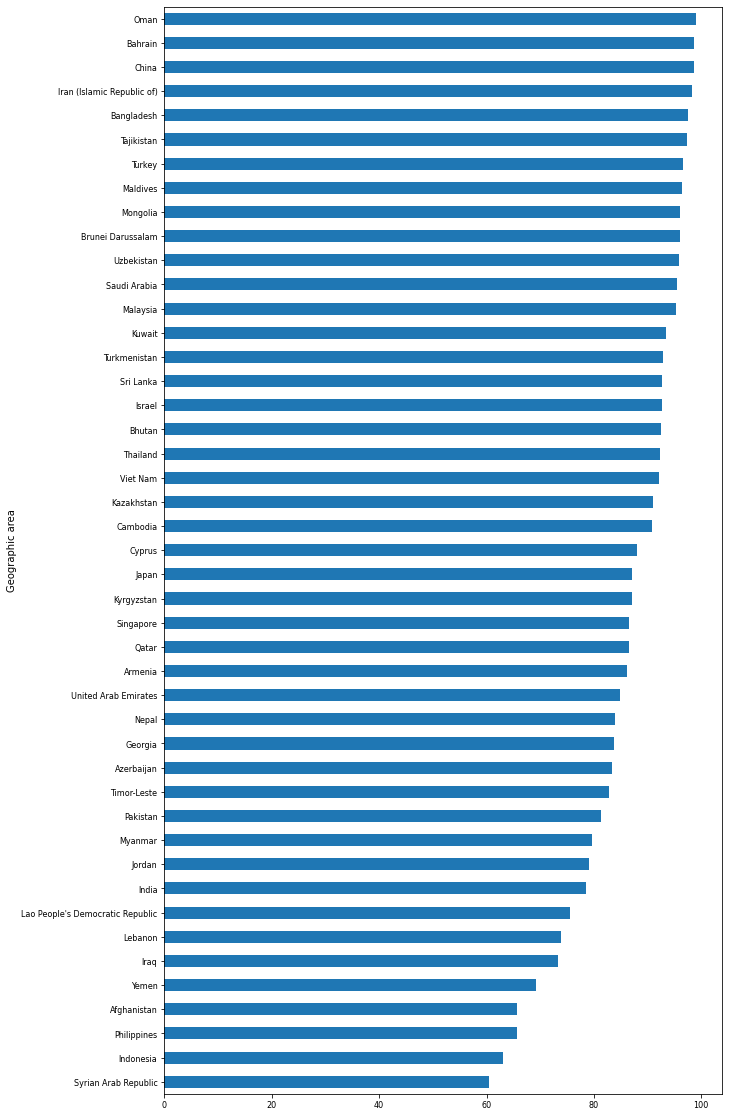

In [36]:
# creating a bar graph to better see the mean 
meanbygroup.plot(kind='barh',fontsize=8,figsize=(10,20))